<a href="https://colab.research.google.com/github/Anusarakh/thesis/blob/main/17_jan_24_FV_ML_DEMO_Version_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1️⃣ เชื่อม google drive

In [4]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/Thesis/song/')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/Thesis/song


 2️⃣ Data preparation by FV

In [8]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import scipy.io.wavfile as wav

In [ ]:
classes_1 = 1
classes_0 = 0

path_0 = '/content/gdrive/MyDrive/song/nontherapy/'
path_1 = '/content/gdrive/MyDrive/song/fortherapy/'

In [ ]:
# tempo = librosa.feature.tempo(y=x, sr=44100 , hop_length=256)
# df_tempo = pd.DataFrame(tempo)

In [ ]:
# tempo[0]

In [ ]:
x_list = os.listdir(path_0)
mfcc_mean_0 = []
mfcc_var_0 = []
spec_cen_mean_0 = []
spec_cen_var_0 = []
spec_band_mean_0 = []
spec_band_var_0 = []
zcr_mean_0 = []
zcr_var_0 = []
tempo = []
classes_0_ = []
tempo_0 = []
for i in x_list:
  x , sr = librosa.load(path_0+i, sr=44100)
  #สกัด MFCC
  mfcc = librosa.feature.mfcc(y=x, sr=44100 ,n_mfcc= 20, n_fft = 512,  hop_length=256 )
  df_mfcc = pd.DataFrame(mfcc)
  mfcc_mean = df_mfcc.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล MFCC
  mfcc_var= df_mfcc.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล MFCC
  #สกัด spectral_centroid
  spec_cen = librosa.feature.spectral_centroid(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_cen = pd.DataFrame(spec_cen)
  spec_cen_mean = df_spec_cen.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_centroid
  spec_cen_var= df_spec_cen.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_centroid
  #สกัด spectral_bandwidth
  spec_band = librosa.feature.spectral_bandwidth(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_band = pd.DataFrame(spec_band)
  spec_band_mean = df_spec_band.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_bandwidth
  spec_band_var= df_spec_band.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_bandwidth
  #สกัด zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=512, hop_length=256)
  df_zcr = pd.DataFrame(zcr)
  zcr_mean = df_zcr.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล zero_crossing_rate
  zcr_var= df_zcr.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล zero_crossing_rate
  #สกัด tempo
  tempo = librosa.feature.tempo(y=x, sr=44100 , hop_length=256)

  mfcc_mean_0.append(list(mfcc_mean))
  mfcc_var_0.append(list(mfcc_var))
  spec_cen_mean_0.append(spec_cen_mean[0])
  spec_cen_var_0.append(spec_cen_var[0])
  spec_band_mean_0.append(spec_band_mean[0])
  spec_band_var_0.append(spec_band_var[0])
  zcr_mean_0.append(zcr_mean[0])
  zcr_var_0.append(zcr_var[0])
  tempo_0.append(tempo[0])

  classes_0_.append(path_0+i)

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
<ipython-input-5-f9bc6b40d0ce>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(path_0+i, sr=44100)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwa

In [ ]:
x_list = os.listdir(path_1)
mfcc_mean_1 = []
mfcc_var_1 = []
spec_cen_mean_1 = []
spec_cen_var_1 = []
spec_band_mean_1 = []
spec_band_var_1 = []
zcr_mean_1 = []
zcr_var_1 = []
tempo = []
classes_1_ = []
tempo_1 = []
for i in x_list:
  x , sr = librosa.load(path_1+i, sr=44100)
  #สกัด MFCC
  mfcc = librosa.feature.mfcc(y=x, sr=44100 ,n_mfcc= 20, n_fft = 512,  hop_length=256 )
  df_mfcc = pd.DataFrame(mfcc)
  mfcc_mean = df_mfcc.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล MFCC
  mfcc_var= df_mfcc.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล MFCC
  #สกัด spectral_centroid
  spec_cen = librosa.feature.spectral_centroid(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_cen = pd.DataFrame(spec_cen)
  spec_cen_mean = df_spec_cen.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_centroid
  spec_cen_var= df_spec_cen.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_centroid
  #สกัด spectral_bandwidth
  spec_band = librosa.feature.spectral_bandwidth(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_band = pd.DataFrame(spec_band)
  spec_band_mean = df_spec_band.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_bandwidth
  spec_band_var= df_spec_band.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_bandwidth
  #สกัด zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=512, hop_length=256)
  df_zcr = pd.DataFrame(zcr)
  zcr_mean = df_zcr.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล zero_crossing_rate
  zcr_var= df_zcr.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล zero_crossing_rate
  #สกัด tempo
  tempo = librosa.feature.tempo(y=x, sr=44100, hop_length=256)


  mfcc_mean_1.append(list(mfcc_mean))
  mfcc_var_1.append(list(mfcc_var))
  spec_cen_mean_1.append(spec_cen_mean[0])
  spec_cen_var_1.append(spec_cen_var[0])
  spec_band_mean_1.append(spec_band_mean[0])
  spec_band_var_1.append(spec_band_var[0])
  zcr_mean_1.append(zcr_mean[0])
  zcr_var_1.append(zcr_var[0])
  tempo_1.append(tempo[0])

  classes_1_.append(path_1+i)

In [ ]:
mfcc_mean_0 = np.array(mfcc_mean_0)
mfcc_mean_1 = np.array(mfcc_mean_1)

mfcc_mean_df = pd.DataFrame(data = mfcc_mean_0)
mfcc_mean_df['spec'] = spec_cen_mean_0
mfcc_mean_df['specband'] = spec_band_mean_0
mfcc_mean_df['zero'] = zcr_mean_0
mfcc_mean_df['tempo'] = tempo_0
mfcc_mean_df['y'] = 0
mfcc_mean_df['path'] = classes_0_

mfcc_mean_df_1 = pd.DataFrame(data = mfcc_mean_1)
mfcc_mean_df_1['spec'] = spec_cen_mean_1
mfcc_mean_df_1['specband'] = spec_band_mean_1
mfcc_mean_df_1['zero'] = zcr_mean_1
mfcc_mean_df_1['tempo'] = tempo_1
mfcc_mean_df_1['y'] = 1
mfcc_mean_df_1['path'] = classes_1_

df_mean = mfcc_mean_df.append(mfcc_mean_df_1)

print(df_mean.shape)
df_mean.head()

(117, 26)


<ipython-input-7-8ce7a2c1c5a2>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mean = mfcc_mean_df.append(mfcc_mean_df_1)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-312.002991,101.441200,-45.043922,19.556147,-4.002711,25.125444,-12.163026,6.906718,-11.586530,-7.614164,...,-0.355107,-4.237078,3.298138,-1.751302,2093.072028,2926.912418,0.041845,161.499023,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...
1,-305.049774,105.443916,-46.023987,17.922361,-13.973338,23.583933,-15.183883,5.439202,-13.734568,-11.125467,...,-0.848754,-3.501495,1.987618,-2.141070,2073.836632,2832.354328,0.042033,96.597547,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...
2,-311.700623,72.263252,-63.784790,21.794674,-13.880082,32.025867,-5.895024,10.517797,-10.559294,-1.611562,...,-0.077911,-4.383029,1.924374,0.213685,2980.200582,3197.992963,0.076791,89.877717,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...
3,-332.027557,88.152557,-38.781132,22.274273,-13.950279,28.794964,-17.807158,12.655805,-10.494971,-12.504717,...,0.777111,-5.741293,5.038650,-1.157517,2519.597325,3232.053316,0.056005,91.468473,0,/content/gdrive/MyDrive/song/nontherapy/SnapSa...
4,-362.134674,104.500938,-33.407307,17.736410,-1.782775,19.366240,-3.317033,2.735603,-11.206043,-7.780622,...,-0.019797,-1.235082,1.928368,-3.210941,1788.219618,2518.429843,0.038724,130.834652,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...


In [3]:
mfcc_var_0 = np.array(mfcc_var_0)
mfcc_var_1 = np.array(mfcc_var_1)

mfcc_var_df = pd.DataFrame(data = mfcc_var_0)
mfcc_var_df['spec'] = spec_cen_var_0
mfcc_var_df['specband'] = spec_band_var_0
mfcc_var_df['zero'] = zcr_var_0
mfcc_var_df['tempo'] = tempo_0
mfcc_var_df['y'] = 0
mfcc_var_df['path'] = classes_0_

mfcc_var_df_1 = pd.DataFrame(data = mfcc_var_1)
mfcc_var_df_1['spec'] = spec_cen_var_1
mfcc_var_df_1['specband'] = spec_band_var_1
mfcc_var_df_1['zero'] = zcr_var_1
mfcc_var_df_1['tempo'] = tempo_1
mfcc_var_df_1['y'] = 1
mfcc_var_df_1['path'] = classes_1_

df_var = mfcc_var_df.append(mfcc_var_df_1)

print(df_var.shape)
df_var.head()

NameError: name 'np' is not defined

In [2]:
import pandas as pd
df_mean.to_csv("./df_mean.csv")
df_var.to_csv("./df_var.csv")

NameError: name 'df_mean' is not defined

## [เริ่มรัน] Split data train/teast by 80:20

In [9]:
import pandas as pd

df_mean = pd.read_csv('./df_mean.csv')
df_mean = df_mean.drop(columns=['Unnamed: 0'])

df_var = pd.read_csv('./df_var.csv')
df_var = df_var.drop(columns=['Unnamed: 0'])

In [ ]:
# df_mean.head()

In [10]:
df_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-312.002991,101.441200,-45.043922,19.556147,-4.002711,25.125444,-12.163026,6.906718,-11.586530,-7.614164,...,-0.355107,-4.237078,3.298138,-1.751302,2093.072028,2926.912418,0.041845,161.499023,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...
1,-305.049774,105.443916,-46.023987,17.922361,-13.973338,23.583933,-15.183883,5.439202,-13.734568,-11.125467,...,-0.848754,-3.501495,1.987618,-2.141070,2073.836632,2832.354328,0.042033,96.597547,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...
2,-311.700623,72.263252,-63.784790,21.794674,-13.880082,32.025867,-5.895024,10.517797,-10.559294,-1.611562,...,-0.077911,-4.383029,1.924374,0.213685,2980.200582,3197.992963,0.076791,89.877717,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...
3,-332.027557,88.152557,-38.781132,22.274273,-13.950279,28.794964,-17.807158,12.655805,-10.494971,-12.504717,...,0.777111,-5.741293,5.038650,-1.157517,2519.597325,3232.053316,0.056005,91.468473,0,/content/gdrive/MyDrive/song/nontherapy/SnapSa...
4,-362.134674,104.500938,-33.407307,17.736410,-1.782775,19.366240,-3.317033,2.735603,-11.206043,-7.780622,...,-0.019797,-1.235082,1.928368,-3.210941,1788.219618,2518.429843,0.038724,130.834652,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...


In [11]:
path = df_mean[df_mean['y']== 0]['path'].tolist()
# print(len(path))
from random import sample
res_samle_0 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_0)))

path = df_mean[df_mean['y']== 1]['path'].tolist()
# print(len(path))
from random import sample
res_samle_1 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_1)))

res_samle_0.extend(res_samle_1)

print(len(res_samle_0))

65
28
93


In [12]:
train = df_mean[df_mean['path'].isin(res_samle_0)]
train['split'] = 'train'
test = df_mean[~df_mean['path'].isin(res_samle_0)]
test['split'] = 'test'

df_all = train.append(test)
print(df_all.shape)
df_all.head()

(117, 27)


<ipython-input-12-d13c214b5ed7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['split'] = 'train'
<ipython-input-12-d13c214b5ed7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['split'] = 'test'
<ipython-input-12-d13c214b5ed7>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = train.append(test)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
0,-312.002991,101.441200,-45.043922,19.556147,-4.002711,25.125444,-12.163026,6.906718,-11.586530,-7.614164,...,-4.237078,3.298138,-1.751302,2093.072028,2926.912418,0.041845,161.499023,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
1,-305.049774,105.443916,-46.023987,17.922361,-13.973338,23.583933,-15.183883,5.439202,-13.734568,-11.125467,...,-3.501495,1.987618,-2.141070,2073.836632,2832.354328,0.042033,96.597547,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
2,-311.700623,72.263252,-63.784790,21.794674,-13.880082,32.025867,-5.895024,10.517797,-10.559294,-1.611562,...,-4.383029,1.924374,0.213685,2980.200582,3197.992963,0.076791,89.877717,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
3,-332.027557,88.152557,-38.781132,22.274273,-13.950279,28.794964,-17.807158,12.655805,-10.494971,-12.504717,...,-5.741293,5.038650,-1.157517,2519.597325,3232.053316,0.056005,91.468473,0,/content/gdrive/MyDrive/song/nontherapy/SnapSa...,train
4,-362.134674,104.500938,-33.407307,17.736410,-1.782775,19.366240,-3.317033,2.735603,-11.206043,-7.780622,...,-1.235082,1.928368,-3.210941,1788.219618,2518.429843,0.038724,130.834652,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train


In [13]:
# var fv same table
df_var['split'] = df_var['path'].map(df_all.set_index('path')['split']) # can map column split by path column
df_var.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
0,4275.583984,805.659607,524.216064,428.165741,270.349396,160.515198,161.883362,134.415359,140.451874,141.683929,...,61.285183,66.693871,57.184452,8.852737e+05,657104.770360,0.000869,161.499023,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
1,4198.060547,623.343262,850.148499,371.768677,335.148956,264.430969,162.590912,156.512039,144.904877,163.349411,...,70.805672,66.077049,61.975136,8.415808e+05,556945.310105,0.000950,96.597547,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
2,6255.282715,1046.415771,842.253845,450.718445,385.070923,327.791595,245.153946,153.240143,144.789597,145.529221,...,70.541389,63.405022,67.011726,2.104529e+06,706740.613776,0.004567,89.877717,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train
3,4197.904297,674.049072,801.130798,556.491150,385.469238,233.962021,251.144867,179.654266,152.669357,166.874222,...,81.620811,87.288498,76.549385,1.183589e+06,556014.997841,0.001922,91.468473,0,/content/gdrive/MyDrive/song/nontherapy/SnapSa...,train
4,7294.022461,1365.812256,763.566284,526.887390,392.473206,235.004105,172.632553,134.790024,119.642456,101.102592,...,60.833050,61.139202,52.264553,1.256965e+06,749983.856764,0.001795,130.834652,0,/content/gdrive/MyDrive/song/nontherapy/SaveTu...,train


# 3️⃣ ML// Random Forest Classifier

## Var fv


In [14]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [15]:
# X_train

In [16]:
import os
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [17]:
n_estimators = [400, 600]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train, y_train)

print(bestF_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 400}


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.784946,0.066284,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.774194,0.069685,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
2,0.763441,0.054828,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
3,0.763441,0.054828,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
4,0.741935,0.045620,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
5,0.752688,0.054828,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
6,0.741935,0.045620,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
7,0.731183,0.040233,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
8,0.698925,0.015207,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
9,0.698925,0.015207,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."


In [ ]:
y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.83      0.71      0.77         7

    accuracy                           0.88        24
   macro avg       0.86      0.83      0.84        24
weighted avg       0.87      0.88      0.87        24

[[16  1]
 [ 2  5]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

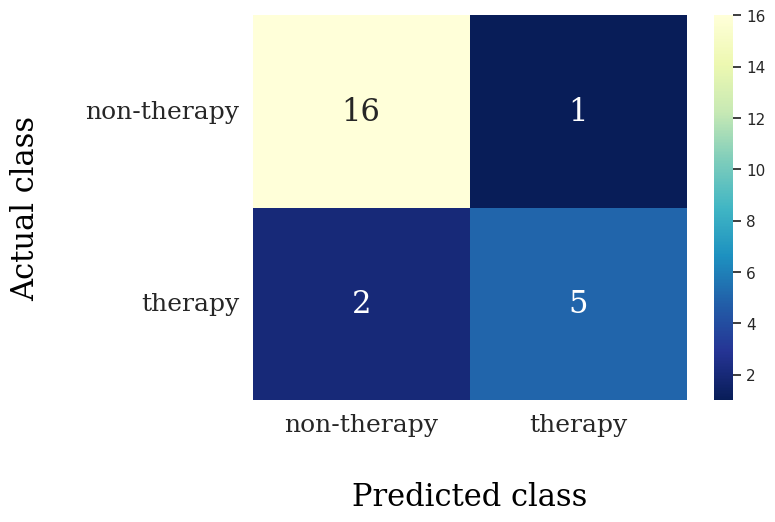

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Var fv - Normalization

In [ ]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [ ]:
X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
import os
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
n_estimators = [400, 600]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_norm, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train_norm, y_train)

print(bestF_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 600}


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.731183,0.066284,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.741935,0.079016,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
2,0.741935,0.079016,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
3,0.752688,0.080466,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
4,0.731183,0.060826,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
5,0.720430,0.054828,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
6,0.720430,0.054828,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
7,0.741935,0.069685,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
8,0.698925,0.015207,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
9,0.698925,0.015207,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."


In [ ]:
y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       0.00      0.00      0.00         7

    accuracy                           0.71        24
   macro avg       0.35      0.50      0.41        24
weighted avg       0.50      0.71      0.59        24

[[17  0]
 [ 7  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

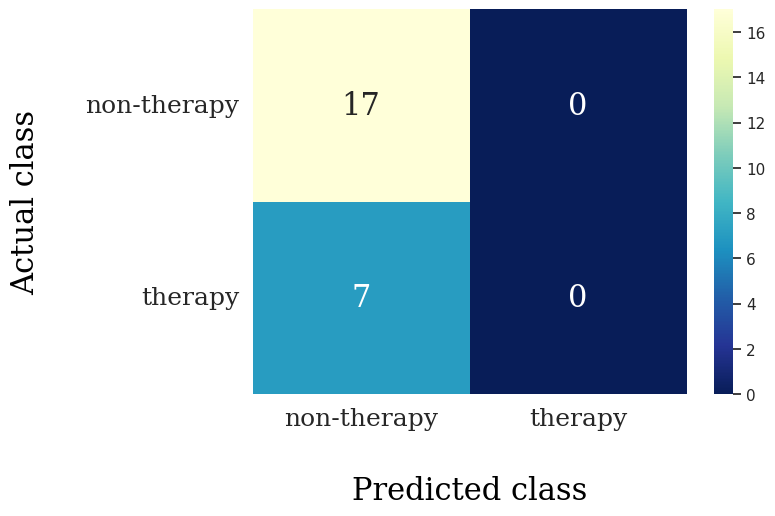

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv

In [18]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train, y_train)

print(bestF_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}


In [19]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.763441,0.066284,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.752688,0.066284,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.741935,0.052677,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.731183,0.066284,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.698925,0.015207,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.752688,0.066284,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.741935,0.052677,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.731183,0.066284,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.731183,0.066284,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.698925,0.015207,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [20]:
y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       1.00      0.43      0.60         7

    accuracy                           0.83        24
   macro avg       0.90      0.71      0.75        24
weighted avg       0.87      0.83      0.81        24

[[17  0]
 [ 4  3]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

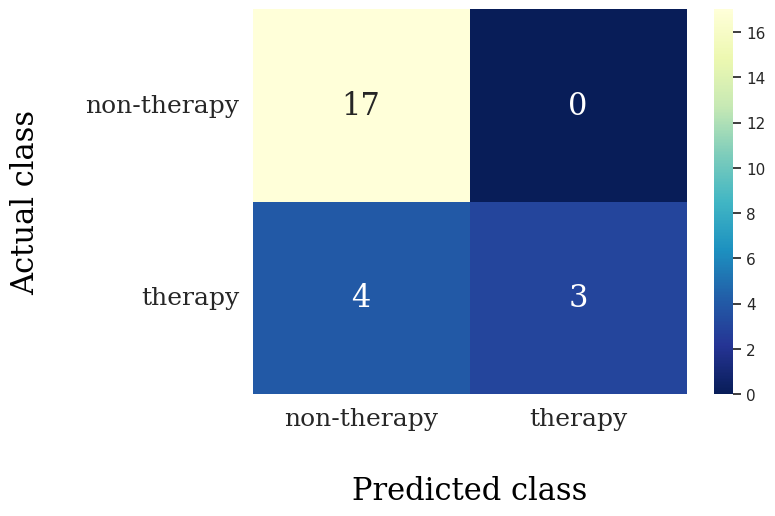

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [22]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm


n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_norm, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train_norm, y_train)

print(bestF_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}


In [23]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.763441,0.066284,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.752688,0.066284,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.731183,0.066284,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.752688,0.054828,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.698925,0.015207,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.752688,0.066284,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.741935,0.052677,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.731183,0.066284,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.741935,0.052677,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.698925,0.015207,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [24]:
y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        17
           1       0.30      1.00      0.47         7

    accuracy                           0.33        24
   macro avg       0.65      0.53      0.29        24
weighted avg       0.80      0.33      0.21        24

[[ 1 16]
 [ 0  7]]


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

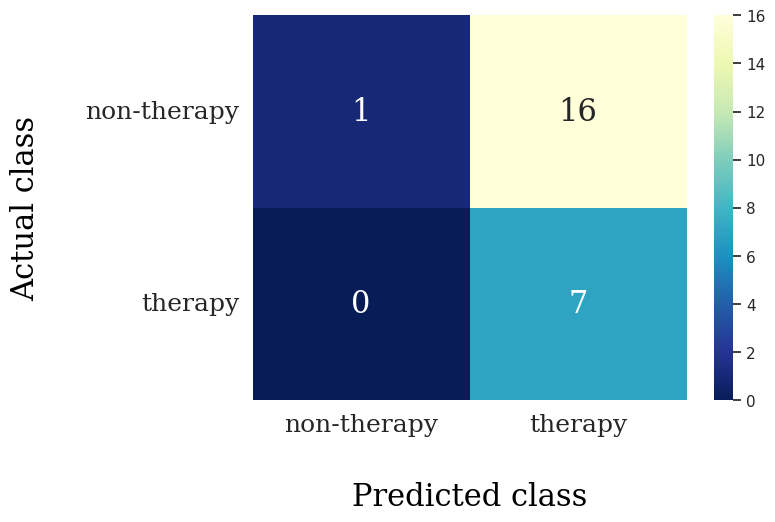

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 4️⃣ ML // SVM Classifier

## Var fv

In [26]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=5)

SVM = grid_search.fit(X_train, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [ ]:
from sklearn import svm
svm= svm.SVC(random_state = 1, C = bestS_['C'], gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train, y_train)

In [ ]:
y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Var fv - Normalization

In [ ]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=5)

SVM = grid_search.fit(X_train_norm, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

In [ ]:
from sklearn import svm
svm= svm.SVC(random_state = 1, C = bestS_['C'], gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train_norm, y_train)


y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv

In [27]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=5)

SVM = grid_search.fit(X_train, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.7736842105263158

 **print the array of mean scores only 

[0.77368421 0.6994152  0.63450292 0.77368421 0.6994152  0.66608187
 0.77368421 0.6994152  0.6128655  0.77368421 0.6994152  0.63391813
 0.79649123 0.6994152  0.63450292 0.79649123 0.6994152  0.66608187
 0.79649123 0.6994152  0.6128655  0.79649123 0.6994152  0.63391813
 0.74210526 0.6994152  0.63450292 0.74210526 0.6994152  0.66608187
 0.74210526 0.6994152  0.6128655  0.74210526 0.6994152  0.63391813
 0.76432749 0.6994152  0.63450292 0.76432749 0.6994152  0.66608187
 0.76432749 0.6994152  0.6128655  0.76432749 0.6994152  0.63391813
 0.6994152  0.6994152  0.63450292 0.6994152  0.6994152  0.66608187
 0.6994152  0.6994152  0.6128655  0.6994152  0.6994152  0.63391813]

 **examine the best model 

0.7964912280701755
{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.01, gamma=0.001, kernel='linear')


In [ ]:
from sklearn import svm
svm= svm.SVC(random_state = 1, C = bestS_['C'], gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train, y_train)


y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [ ]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=5)

SVM = grid_search.fit(X_train_norm, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

In [ ]:
from sklearn import svm
svm= svm.SVC(random_state = 1, C = bestS_['C'], gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train_norm, y_train)

y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 5️⃣ ML // DT Classifier

## Var fv

In [ ]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Setup the parameters and distributions to sample from : param_dist
param_dist  = {'min_samples_split': [2, 4, 6, 10],
                      'min_samples_leaf': [1, 2, 4, 10],
                      'max_depth': [None, 4, 10],
                      'splitter' : ('best', 'random'),
                      'max_features':[None, 2, 4, 6],
                      'class_weight':[{0: w} for w in [1, 2, 4]]}
#Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

#Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist , cv =5)

#Fit it to the data
tree_cv.fit(X_train,y_train )


# examine the first result
print("**examine the first result","\n")

print(tree_cv.cv_results_['params'][0])
print(tree_cv.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = tree_cv.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(tree_cv.best_score_)
print(tree_cv.best_params_)
print(tree_cv.best_estimator_)

bestT_ = tree_cv.best_params_

#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


**examine the first result 

{'class_weight': {0: 1}, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.6771929824561403

 **print the array of mean scores only 

[0.67719298 0.59122807 0.70877193 ... 0.6994152  0.6994152  0.6994152 ]

 **examine the best model 

0.8380116959064328
{'class_weight': {0: 4}, 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeClassifier(class_weight={0: 4}, max_depth=10, max_features=4,
                       min_samples_leaf=2)
Tuned Decision Tree Parameters: {'class_weight': {0: 4}, 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best score is 0.8380116959064328


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(tree_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.677193,0.110874,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
1,0.591228,0.139843,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
2,0.708772,0.115763,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
3,0.645029,0.026516,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
4,0.708772,0.124968,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
...,...,...,...
1147,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1148,0.720468,0.038463,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1149,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1150,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."


In [ ]:
#Hyperparameter
tree =  DecisionTreeClassifier(criterion = 'entropy',
                               class_weight = bestT_['class_weight'],
                               max_depth = bestT_['max_depth'],
                               max_features =bestT_['max_features'],
                               min_samples_leaf = bestT_['min_samples_leaf'],
                               min_samples_split = bestT_['min_samples_split'],
                               splitter = bestT_['splitter'] )
tree_cv = tree.fit(X_train_norm, y_train)

#Predicting the Test set results
y_pred = tree_cv.predict(X_test_norm)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[13  4]
 [ 6  1]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.20      0.14      0.17         7

    accuracy                           0.58        24
   macro avg       0.44      0.45      0.44        24
weighted avg       0.54      0.58      0.56        24



(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

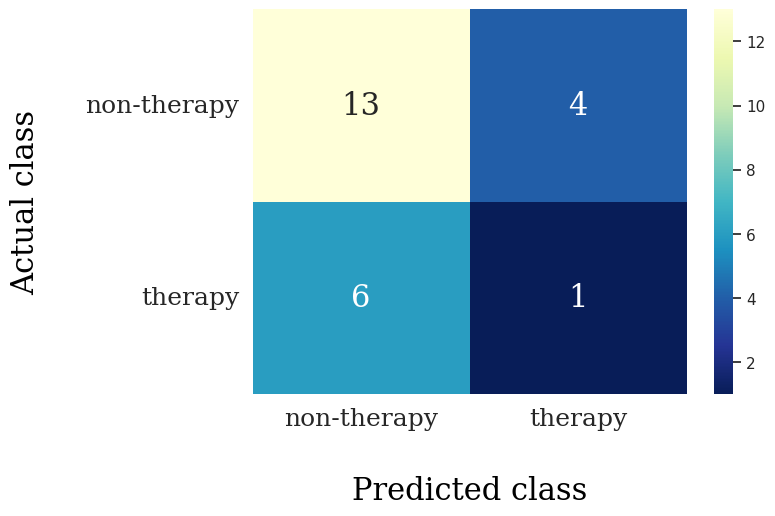

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Var fv - Normalization

In [ ]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Setup the parameters and distributions to sample from : param_dist
param_dist  = {'min_samples_split': [2, 4, 6, 10],
                      'min_samples_leaf': [1, 2, 4, 10],
                      'max_depth': [None, 4, 10],
                      'splitter' : ('best', 'random'),
                      'max_features':[None, 2, 4, 6],
                      'class_weight':[{0: w} for w in [1, 2, 4]]}
#Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

#Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist , cv =5)

#Fit it to the data
tree_cv.fit(X_train_norm,y_train )


# examine the first result
print("**examine the first result","\n")

print(tree_cv.cv_results_['params'][0])
print(tree_cv.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = tree_cv.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(tree_cv.best_score_)
print(tree_cv.best_params_)
print(tree_cv.best_estimator_)

bestT_ = tree_cv.best_params_

#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


**examine the first result 

{'class_weight': {0: 1}, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.7011695906432749

 **print the array of mean scores only 

[0.70116959 0.70877193 0.72163743 ... 0.6994152  0.70994152 0.6994152 ]

 **examine the best model 

0.8169590643274856
{'class_weight': {0: 1}, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeClassifier(class_weight={0: 1}, min_samples_leaf=10)
Tuned Decision Tree Parameters: {'class_weight': {0: 1}, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Best score is 0.8169590643274856


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(tree_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.701170,0.093172,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
1,0.708772,0.059368,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
2,0.721637,0.081608,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
3,0.632749,0.115512,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
4,0.711111,0.075332,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
...,...,...,...
1147,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1148,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1149,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1150,0.709942,0.021677,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."


In [ ]:
#Hyperparameter
tree =  DecisionTreeClassifier(criterion = 'entropy',
                               class_weight = bestT_['class_weight'],
                               max_depth = bestT_['max_depth'],
                               max_features =bestT_['max_features'],
                               min_samples_leaf = bestT_['min_samples_leaf'],
                               min_samples_split = bestT_['min_samples_split'],
                               splitter = bestT_['splitter'] )
tree_cv = tree.fit(X_train_norm, y_train)

#Predicting the Test set results
y_pred = tree_cv.predict(X_test_norm)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[17  0]
 [ 6  1]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.14      0.25         7

    accuracy                           0.75        24
   macro avg       0.87      0.57      0.55        24
weighted avg       0.82      0.75      0.67        24



(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

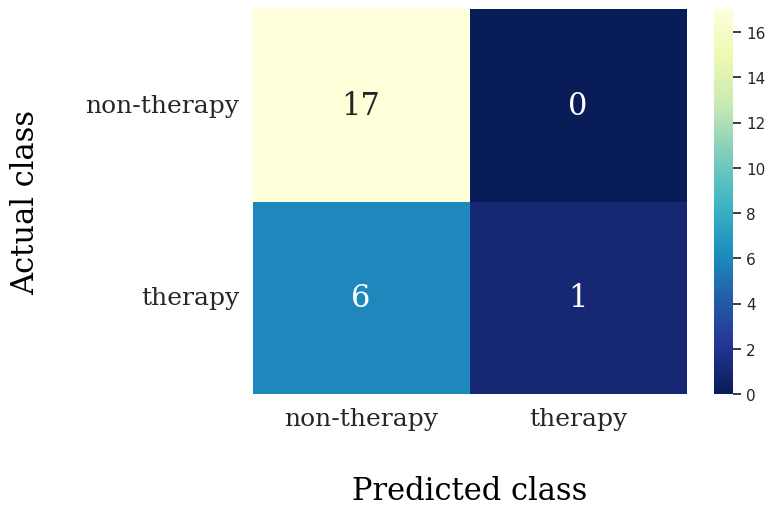

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv

In [ ]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Setup the parameters and distributions to sample from : param_dist
param_dist  = {'min_samples_split': [2, 4, 6, 10],
                      'min_samples_leaf': [1, 2, 4, 10],
                      'max_depth': [None, 4, 10],
                      'splitter' : ('best', 'random'),
                      'max_features':[None, 2, 4, 6],
                      'class_weight':[{0: w} for w in [1, 2, 4]]}
#Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

#Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist , cv =5)

#Fit it to the data
tree_cv.fit(X_train,y_train )


# examine the first result
print("**examine the first result","\n")

print(tree_cv.cv_results_['params'][0])
print(tree_cv.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = tree_cv.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(tree_cv.best_score_)
print(tree_cv.best_params_)
print(tree_cv.best_estimator_)

bestT_ = tree_cv.best_params_

#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

**examine the first result 

{'class_weight': {0: 1}, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.6888888888888889

 **print the array of mean scores only 

[0.68888889 0.68538012 0.6877193  ... 0.6994152  0.68830409 0.6994152 ]

 **examine the best model 

0.8064327485380117
{'class_weight': {0: 2}, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
DecisionTreeClassifier(class_weight={0: 2}, min_samples_split=10,
                       splitter='random')
Tuned Decision Tree Parameters: {'class_weight': {0: 2}, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Best score is 0.8064327485380117


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(tree_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.688889,0.057673,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
1,0.685380,0.139601,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
2,0.687719,0.053674,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
3,0.591813,0.123121,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
4,0.677193,0.049158,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
...,...,...,...
1147,0.688889,0.033318,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1148,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1149,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1150,0.688304,0.018270,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."


In [ ]:
#Hyperparameter
tree =  DecisionTreeClassifier(criterion = 'entropy',
                               class_weight = bestT_['class_weight'],
                               max_depth = bestT_['max_depth'],
                               max_features =bestT_['max_features'],
                               min_samples_leaf = bestT_['min_samples_leaf'],
                               min_samples_split = bestT_['min_samples_split'],
                               splitter = bestT_['splitter'] )

tree_cv = tree.fit(X_train, y_train)

#Predicting the Test set results
y_pred = tree_cv.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[11  6]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.25      0.29      0.27         7

    accuracy                           0.54        24
   macro avg       0.47      0.47      0.47        24
weighted avg       0.56      0.54      0.55        24



(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

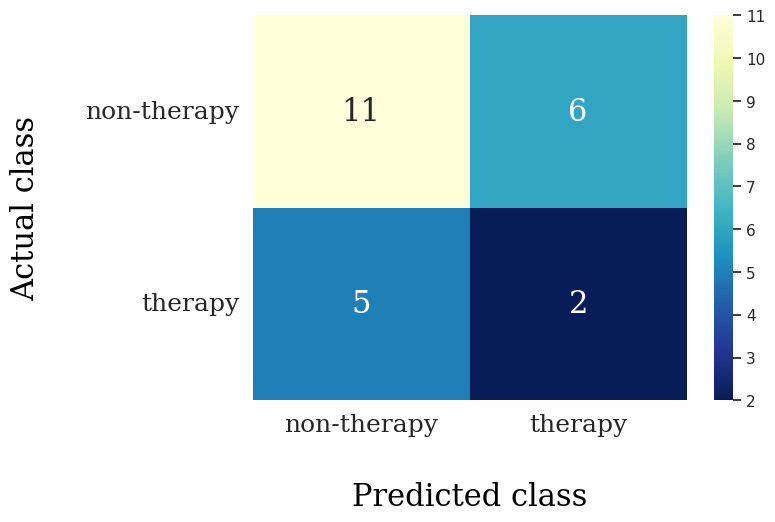

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [ ]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Setup the parameters and distributions to sample from : param_dist
param_dist  = {'min_samples_split': [2, 4, 6, 10],
                      'min_samples_leaf': [1, 2, 4, 10],
                      'max_depth': [None, 4, 10],
                      'splitter' : ('best', 'random'),
                      'max_features':[None, 2, 4, 6],
                      'class_weight':[{0: w} for w in [1, 2, 4]]}
#Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

#Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist , cv =5)

#Fit it to the data
tree_cv.fit(X_train_norm,y_train )


# examine the first result
print("**examine the first result","\n")

print(tree_cv.cv_results_['params'][0])
print(tree_cv.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = tree_cv.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(tree_cv.best_score_)
print(tree_cv.best_params_)
print(tree_cv.best_estimator_)

bestT_ = tree_cv.best_params_

#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

**examine the first result 

{'class_weight': {0: 1}, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.6327485380116958

 **print the array of mean scores only 

[0.63274854 0.64619883 0.64444444 ... 0.6994152  0.66608187 0.6994152 ]

 **examine the best model 

0.8058479532163743
{'class_weight': {0: 2}, 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
DecisionTreeClassifier(class_weight={0: 2}, max_depth=10, max_features=4,
                       min_samples_leaf=2, min_samples_split=10)
Tuned Decision Tree Parameters: {'class_weight': {0: 2}, 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best score is 0.8058479532163743


In [ ]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(tree_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.632749,0.079468,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
1,0.646199,0.057774,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
2,0.644444,0.077771,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
3,0.719298,0.066574,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
4,0.666082,0.090604,"{'class_weight': {0: 1}, 'max_depth': None, 'm..."
...,...,...,...
1147,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1148,0.719883,0.042989,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1149,0.699415,0.018622,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."
1150,0.666082,0.028313,"{'class_weight': {0: 4}, 'max_depth': 10, 'max..."


In [ ]:
#Hyperparameter
tree =  DecisionTreeClassifier(criterion = 'entropy',
                               class_weight = bestT_['class_weight'],
                               max_depth = bestT_['max_depth'],
                               max_features =bestT_['max_features'],
                               min_samples_leaf = bestT_['min_samples_leaf'],
                               min_samples_split = bestT_['min_samples_split'],
                               splitter = bestT_['splitter'] )
tree_cv = tree.fit(X_train_norm, y_train)

#Predicting the Test set results
y_pred = tree_cv.predict(X_test_norm)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[9 8]
 [3 4]]
              precision    recall  f1-score   support

           0       0.75      0.53      0.62        17
           1       0.33      0.57      0.42         7

    accuracy                           0.54        24
   macro avg       0.54      0.55      0.52        24
weighted avg       0.63      0.54      0.56        24



(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

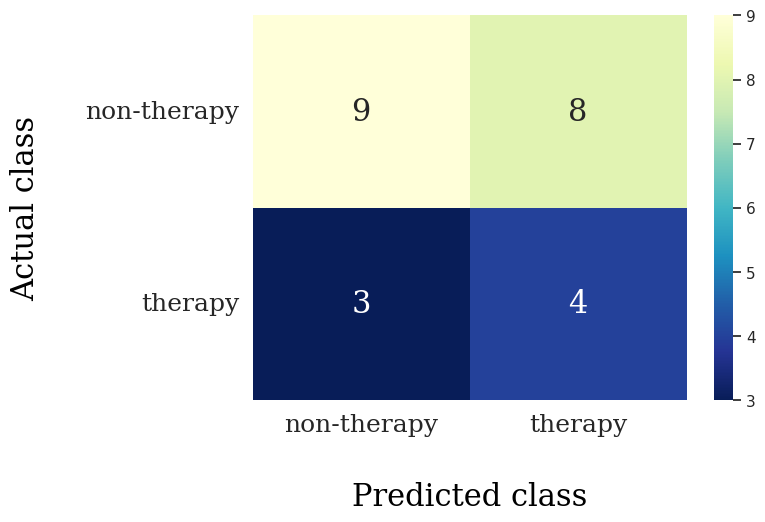

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 6️⃣ ML // KNN Classifier

## Var fv

In [ ]:
# train.iloc[:, 0:24]

In [ ]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
# prediction = knn.predict(X_test, y_test)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[16  1]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.67      0.29      0.40         7

    accuracy                           0.75        24
   macro avg       0.71      0.61      0.62        24
weighted avg       0.73      0.75      0.71        24



(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

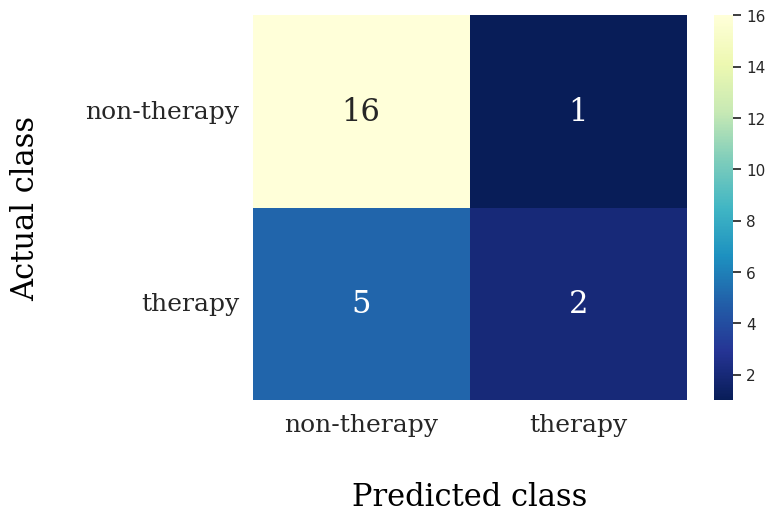

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Var fv - Normalization

In [ ]:
train = df_var[df_var['split'] =='train']
test = df_var[df_var['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_norm, y_train)

y_pred = knn.predict(X_test_norm)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[17  0]
 [ 7  0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       0.00      0.00      0.00         7

    accuracy                           0.71        24
   macro avg       0.35      0.50      0.41        24
weighted avg       0.50      0.71      0.59        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

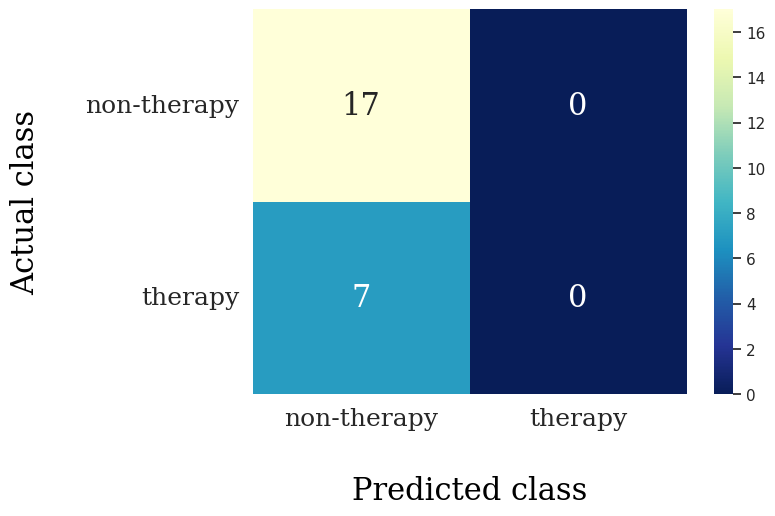

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv

In [ ]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[17  0]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        17
           1       1.00      0.29      0.44         7

    accuracy                           0.79        24
   macro avg       0.89      0.64      0.66        24
weighted avg       0.84      0.79      0.75        24



(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

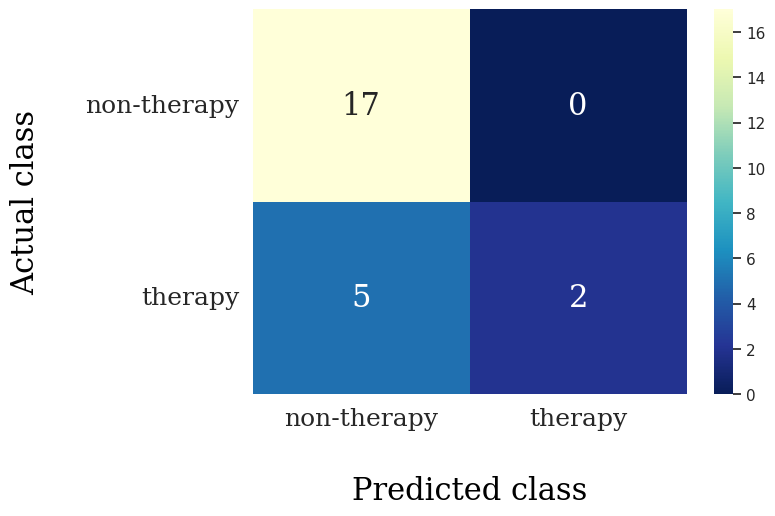

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [ ]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_norm, y_train)

y_pred = knn.predict(X_test_norm)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[17  0]
 [ 7  0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       0.00      0.00      0.00         7

    accuracy                           0.71        24
   macro avg       0.35      0.50      0.41        24
weighted avg       0.50      0.71      0.59        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

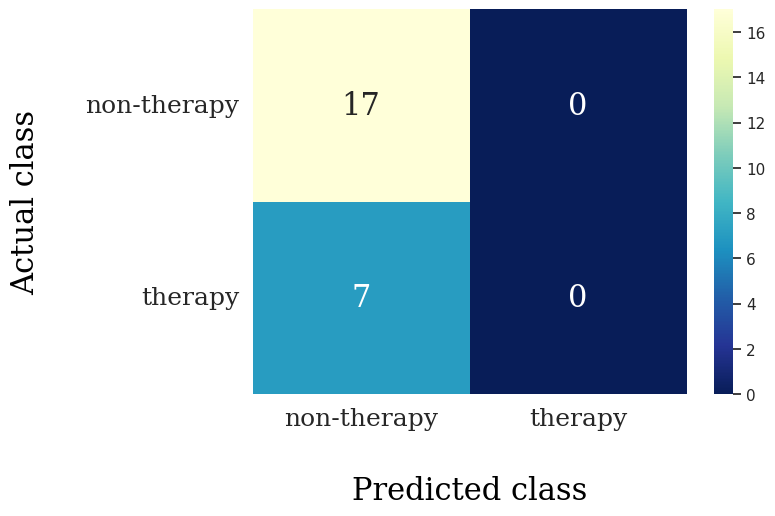

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}

# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) # Blues, Oranges, Reds, YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)